In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# library from preprocessing Module.
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


# library from model selection Module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
pd.set_option("display.max_columns", None)

In [183]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [184]:
# For this project, we won't use the customerID column, so let's drop it!
df.drop(columns = ['customerID'], axis=1, inplace=True)


In [185]:
cols = ['gender','Partner','Dependents','PhoneService',	'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','TotalCharges','PaperlessBilling','PaymentMethod']

ord = OrdinalEncoder()
ord.fit(df[cols])
df[cols] = ord.transform(df[cols])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,No
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,No
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,Yes
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,No
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,Yes


In [186]:
Churn_ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)
Churn_dummies = Churn_ohe.fit_transform(df[['Churn']])
df.drop(columns=['Churn'],inplace=True)


In [187]:
df = pd.concat([df, pd.DataFrame(Churn_dummies)], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,0
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1


In [188]:
df.rename(columns={0:"Churn"}, inplace=True)

In [189]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1


In [190]:
# Printing unique value counts for each variable
for i in df.columns:
    print(f"----{i}----\n")
    print(df[i].value_counts())
    print('='*35)

----gender----

1.0    3555
0.0    3488
Name: gender, dtype: int64
----SeniorCitizen----

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----Partner----

0.0    3641
1.0    3402
Name: Partner, dtype: int64
----Dependents----

0.0    4933
1.0    2110
Name: Dependents, dtype: int64
----tenure----

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
----PhoneService----

1.0    6361
0.0     682
Name: PhoneService, dtype: int64
----MultipleLines----

0.0    3390
2.0    2971
1.0     682
Name: MultipleLines, dtype: int64
----InternetService----

1.0    3096
0.0    2421
2.0    1526
Name: InternetService, dtype: int64
----OnlineSecurity----

0.0    3498
2.0    2019
1.0    1526
Name: OnlineSecurity, dtype: int64
----OnlineBackup----

0.0    3088
2.0    2429
1.0    1526
Name: OnlineBackup, dtype: int64
----DeviceProtection----

0.0    3095
2.0    2422
1.0    1526
Name: DeviceProtection, dtype:

In [191]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=1)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train: 4930
X_test: 2113
y_train 4930
y_test 2113


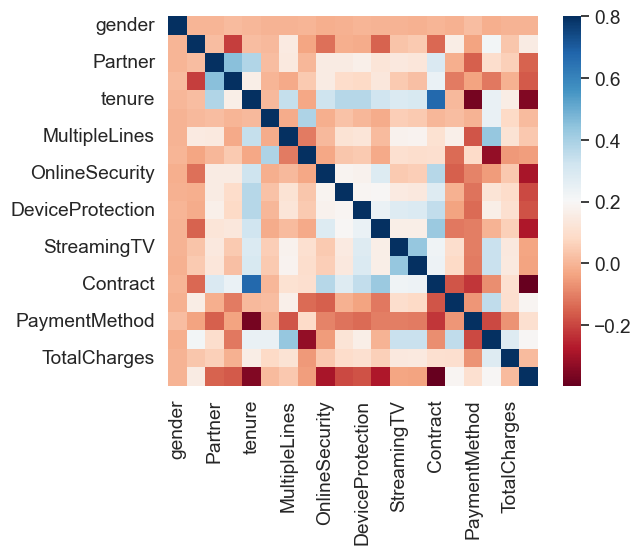

In [192]:
#correlation matrix
corrmat = df.corr()
#f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdBu");


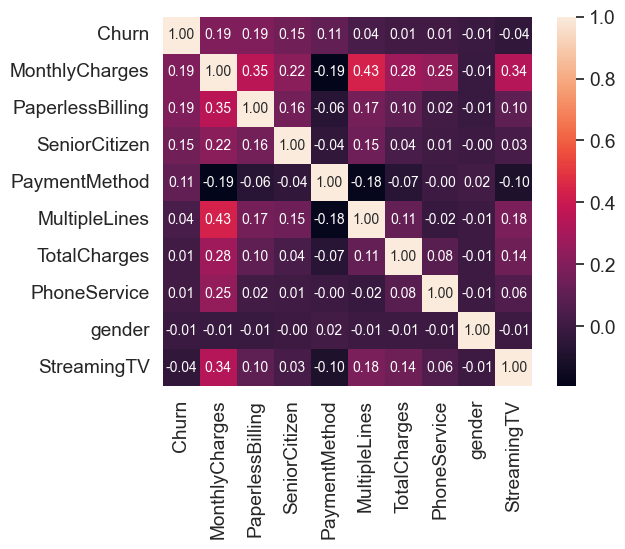

In [193]:
k = 10 
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values);

In [194]:
# Let's standardize tenure, MonthlyCharges and TotalCharges
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

#### Logistic Regression

In [195]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy)

Logistic Regression accuracy is : 0.8097491717936584


In [196]:
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))

confusion matrix
[[1410  175]
 [ 227  301]]


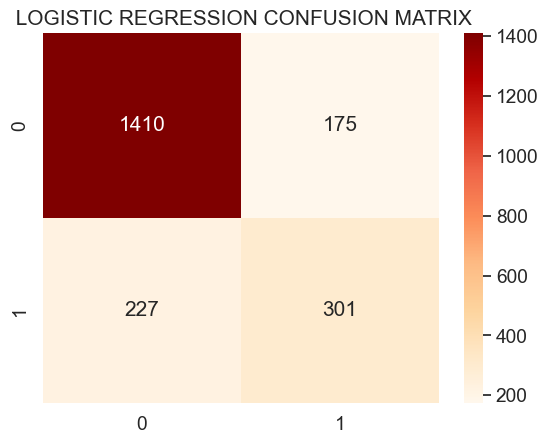

In [197]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX");

In [198]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



#### Decision Tree

In [199]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy)

Decision Tree accuracy is : 0.7297681022243256


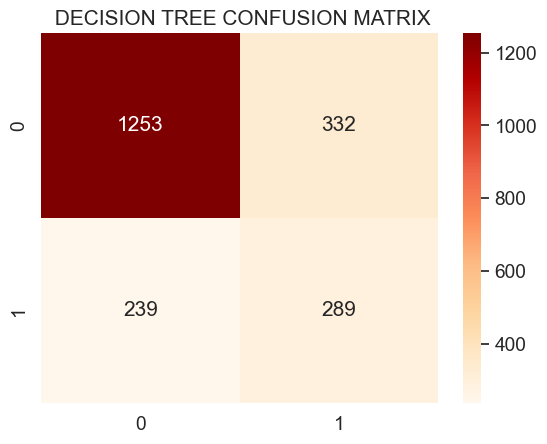

In [200]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" DECISION TREE CONFUSION MATRIX");

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1585
           1       0.47      0.55      0.50       528

    accuracy                           0.73      2113
   macro avg       0.65      0.67      0.66      2113
weighted avg       0.75      0.73      0.74      2113



#### Random Forest

In [202]:
#model = RandomForestClassifier(n_estimators=500, n_jobs = -1,random_state = 50 )
#model.fit(X_train, y_train)

model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train,y_train)

# Make predictions
prediction_test = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Random forest accuracy :",accuracy)

Random forest accuracy : 0.8069096071935636


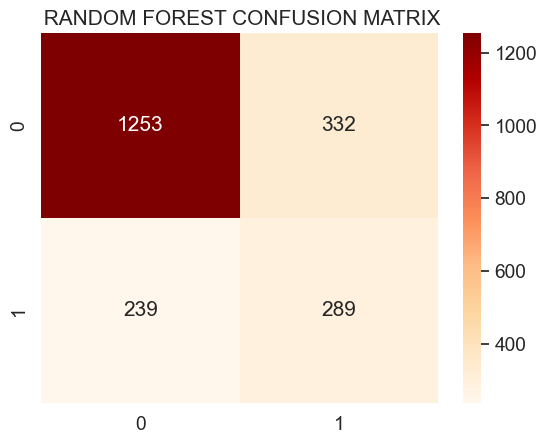

In [203]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" RANDOM FOREST CONFUSION MATRIX");

In [204]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1585
           1       0.64      0.53      0.58       528

    accuracy                           0.81      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



#### K-Nearest Neighbors

In [205]:
model = make_pipeline(StandardScaler(),KNeighborsClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("K-Nearest Neighbors: ", accuracy)

K-Nearest Neighbors:  0.7619498343587316


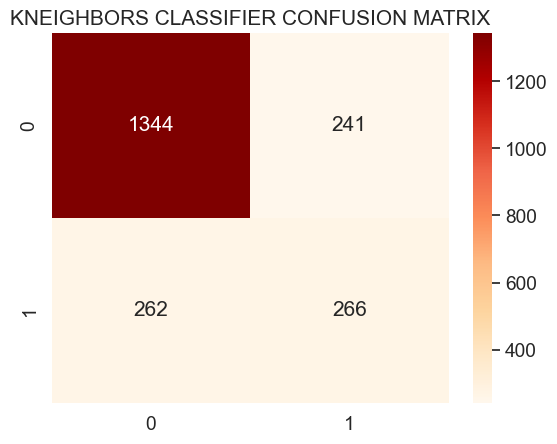

In [206]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("KNEIGHBORS CLASSIFIER CONFUSION MATRIX");

In [207]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1585
           1       0.52      0.50      0.51       528

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.76      0.76      0.76      2113



#### AdaBoost Classifier

In [208]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("AdaBoost Classifier accuracy :",accuracy)

AdaBoost Classifier accuracy : 0.8121154756270705


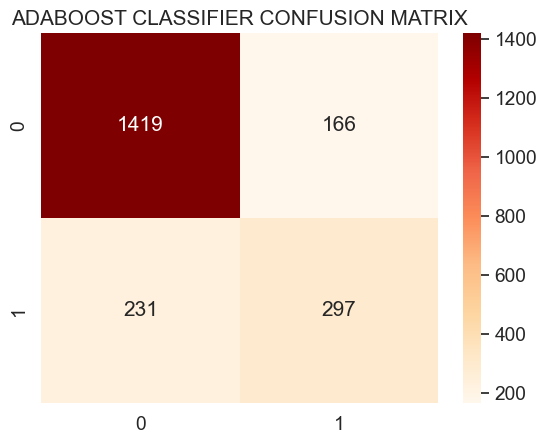

In [209]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("ADABOOST CLASSIFIER CONFUSION MATRIX");

In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



#### Gradient Boosting Classifier

In [211]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred))

Gradient Boosting Classifier 0.8106956933270232


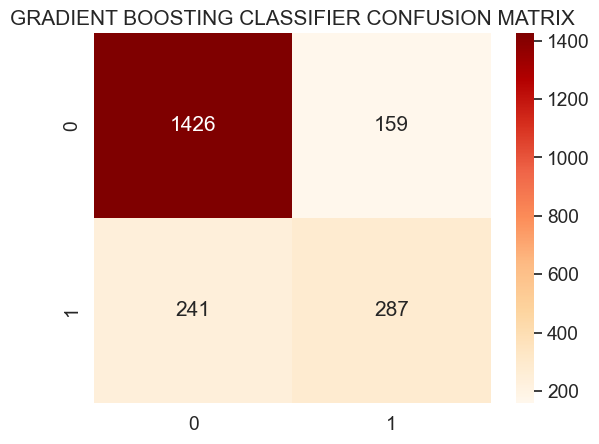

In [212]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX");

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.81      2113



#### Extra Tree Classifier

In [214]:
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Extra Trees Classifier Score :", accuracy_score(y_test, y_pred))

Extra Trees Classifier Score : 0.7827733080927591


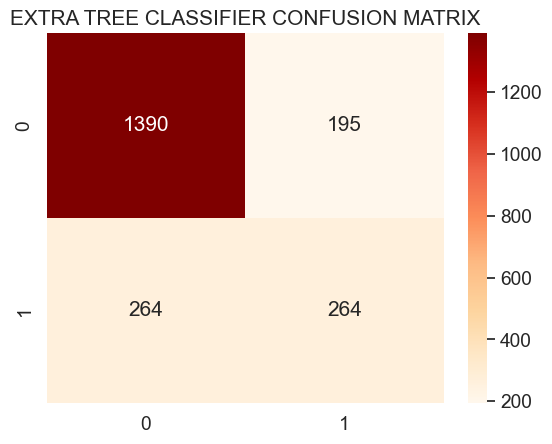

In [215]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("EXTRA TREE CLASSIFIER CONFUSION MATRIX");

In [216]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1585
           1       0.58      0.50      0.53       528

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113

